In [1]:
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from textblob import TextBlob
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import emoji

C:\Users\gorla\anaconda3\desktop\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv(r"D:\Vishu\My\Innomatics\286\Data_Sets\Mental Health.csv")

In [3]:
df

,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety
...,...,...,...
53038,53038,Nobody takes me seriously I’ve (24M) dealt wit...,Anxiety
53039,53039,"selfishness ""I don't feel very good, it's lik...",Anxiety
53040,53040,Is there any way to sleep better? I can't slee...,Anxiety
53041,53041,"Public speaking tips? Hi, all. I have to give ...",Anxiety


In [4]:
df = df.drop(["Unnamed: 0"], axis = 1)

In [5]:
df

,statement,status
0,oh my gosh,Anxiety
1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,I've shifted my focus to something else but I'...,Anxiety
4,"I'm restless and restless, it's been a month n...",Anxiety
...,...,...
53038,Nobody takes me seriously I’ve (24M) dealt wit...,Anxiety
53039,"selfishness ""I don't feel very good, it's lik...",Anxiety
53040,Is there any way to sleep better? I can't slee...,Anxiety
53041,"Public speaking tips? Hi, all. I have to give ...",Anxiety


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53043 entries, 0 to 53042
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   statement  52681 non-null  object
 1   status     53043 non-null  object
dtypes: object(2)
memory usage: 828.9+ KB


In [7]:
df[df['statement'].isna()][['statement', 'status']]

,statement,status
293,NaN,Anxiety
572,NaN,Anxiety
595,NaN,Anxiety
1539,NaN,Normal
2448,NaN,Normal
...,...,...
52838,NaN,Anxiety
52870,NaN,Anxiety
52936,NaN,Anxiety
53010,NaN,Anxiety


In [8]:
df['statement'][40000]

'it s been a lot of stress past the last three year i feel like i can t take it anymore i m too anti social i can t talk to anyone i just start shaking and can t say a word and then this feeling of embarrassment will haunt me for the rest of the day no one want to talk with me i feel like i shouldn t be here like i m a burden to everyone i have to hold my emotion inside never letting them out and this is killing me i ve been cry for the last few day i feel so pathetic am i the problem i am so lost'

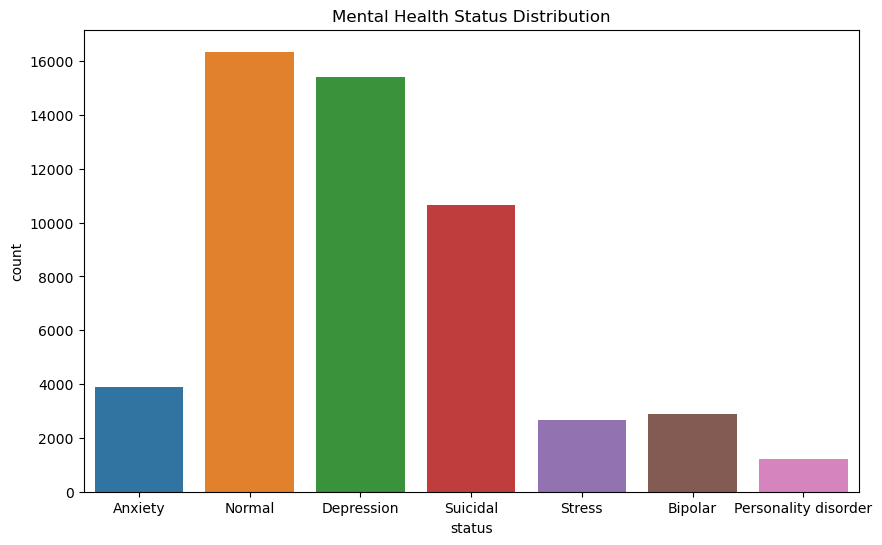

In [9]:
## mental health distribution

plt.figure(figsize= (10, 6))
plt.title('Mental Health Status Distribution')
sns.countplot(x=df['status'])
plt.show()

In [10]:
df.dropna(inplace = True)

In [11]:
df[df['statement'].isna()][['statement', 'status']]

,statement,status


In [12]:
df['statement'].str.lower()

0                                               oh my gosh
1        trouble sleeping, confused mind, restless hear...
2        all wrong, back off dear, forward doubt. stay ...
3        i've shifted my focus to something else but i'...
4        i'm restless and restless, it's been a month n...
                               ...                        
53038    nobody takes me seriously i’ve (24m) dealt wit...
53039    selfishness  "i don't feel very good, it's lik...
53040    is there any way to sleep better? i can't slee...
53041    public speaking tips? hi, all. i have to give ...
53042    i have really bad door anxiety! it's not about...
Name: statement, Length: 52681, dtype: object

In [13]:
df

,statement,status
0,oh my gosh,Anxiety
1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,I've shifted my focus to something else but I'...,Anxiety
4,"I'm restless and restless, it's been a month n...",Anxiety
...,...,...
53038,Nobody takes me seriously I’ve (24M) dealt wit...,Anxiety
53039,"selfishness ""I don't feel very good, it's lik...",Anxiety
53040,Is there any way to sleep better? I can't slee...,Anxiety
53041,"Public speaking tips? Hi, all. I have to give ...",Anxiety


In [14]:
def eda(data,column):
    count = 0
    count = data[column].apply(lambda x: count + emoji.emoji_count(x)).sum()  #emoji count in the data
    upper =data[column].str.isupper().sum()
    url = data[column].apply(lambda x:   True  if re.search(r'www.\S+ | https?://\S+',x)  else False).sum()
    tags = data[column].apply(lambda x:   True  if re.search(r'<[^>]>+',x)  else False).sum()
    marks = data[column].apply(lambda x:   True  if re.search(r'[^a-zA-Z0-9 ]',x)  else False).sum()
    digits = data[column].apply(lambda x:   True  if re.search(r'[0-9]',x)  else False).sum()
    return  pd.Series({'Emoji':count,"upper case":upper,"urls" : url,"HTML tags":tags,'Punctuaton':marks,'Digits':digits})

In [30]:
df['statement'] = df['statement'].apply(lambda x : emoji.demojize(x).replace(':',''))

In [31]:
df['statement'] = df['statement'].str.lower()

In [32]:
df['statement'] = df['statement'].apply(lambda x :re.sub(r'www.\S+ | https?://\S+', ' ' ,x))

In [33]:
df['statement'] = df['statement'].apply(lambda x :re.sub(r'[^a-zA-Z0-9 ]',' ' ,x))

In [34]:
df['statement'] = df['statement'].apply(lambda x :re.sub(r'[0-9]',' ' ,x))

In [35]:
eda(df,'statement')

Emoji         0
upper case    0
urls          0
HTML tags     0
Punctuaton    0
Digits        0
dtype: int64

In [21]:
## df.to_csv('Mntl_Health.csv')

In [22]:
## import os
## os.getcwd()

# Bag of Words(Count of words)

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

In [37]:
bow = CountVectorizer(stop_words='english', max_features=10000)  

In [76]:
bow.fit(df['statement'])
X = bow.transform(df['statement'])
y = df['status']

In [41]:
bow.vocabulary_

{'oh': 6001,
 'gosh': 3814,
 'trouble': 9201,
 'sleeping': 8044,
 'confused': 1767,
 'mind': 5516,
 'restless': 7373,
 'heart': 4058,
 'tune': 9230,
 'wrong': 9923,
 'dear': 2172,
 'forward': 3559,
 'doubt': 2639,
 'stay': 8379,
 'place': 6456,
 've': 9530,
 'shifted': 7869,
 'focus': 3493,
 'worried': 9884,
 'month': 5617,
 'boy': 1038,
 'mean': 5383,
 'break': 1062,
 'nervous': 5796,
 'like': 5079,
 'heck': 4079,
 'feel': 3321,
 'scared': 7625,
 'anxious': 391,
 'family': 3254,
 'protected': 6817,
 'felt': 3331,
 'didn': 2398,
 'know': 4897,
 'haven': 4027,
 'slept': 8049,
 'days': 2156,
 'huh': 4264,
 'really': 7066,
 'want': 9663,
 'night': 5831,
 'don': 2613,
 'strange': 8462,
 'feeling': 3322,
 'good': 3800,
 'lately': 4952,
 'time': 8993,
 'sleep': 8042,
 'needed': 5767,
 'problem': 6734,
 'laugh': 4956,
 'forget': 3534,
 'remember': 7246,
 'turns': 9238,
 'sad': 7557,
 'burden': 1153,
 'blah': 905,
 'worry': 9887,
 'thoughts': 8939,
 'make': 5278,
 'afraid': 201,
 'close': 1544

In [77]:
df1 = df.sample(10000)

In [78]:
X = bow.fit_transform(df1['statement'])
y = df1['status']

In [71]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=23)

# KNN

In [79]:
from sklearn.metrics import accuracy_score

In [80]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.4635

## Naive Bayes

In [74]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train,y_train)
y_pred = nb.predict(X_test)
accuracy_score(y_test,y_pred)

0.6575

# Decssion Tree

In [75]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
accuracy_score(y_test,y_pred)

0.6255

# Support Vector Classifier

In [ ]:
# from sklearn.svm import SVC
# sv = SVC()
# sv.fit(X_train,y_train)
# y_pred = sv.predict(X_test)
# accuracy_score(y_test,y_pred)

In [53]:
import pickle

In [54]:
pickle.dump(nb,open("mh.pkl","wb"))  # writing as a binary format

In [55]:
model = pickle.load(open("mh.pkl","rb"))

In [56]:
pickle.dump(bow,open("bow1.pkl","wb"))  # writing as a binary format

In [57]:
bow = pickle.load(open("bow1.pkl","rb"))

In [81]:
df1

,statement,status
43716,slept badly still feel like hell but maybe not...,Normal
50617,i m spiraling out of control and being diagnos...,Bipolar
41905,hummiemd i know i wa really surprised since ev...,Normal
1935,it s on a the jp server doesn t watch commer...,Normal
16693,i feel like i will not ever find true friends ...,Depression
...,...,...
30198,so how have you been lately,Normal
44037,just bought a car and my impending fatherhood ...,Normal
22985,i feel like dying i do not know how to explai...,Depression
44414,sooo not motivated to do work,Normal


In [90]:
df['statement'][46657]

'should i tell him  hi everyone      i m currently doing my honours in zoology which entails a research project  i have two supervisors one of the professors at my uni and a postdoc whose research i will be elaborating on      it s a lot of work so far  writing up  going through literature  making proposals  etc    i started this year off on a really bad foot and i ve just been in a really low place for the whole of it  i m type    so i m either down or i m really down      anyway  it s definitely affecting my productivity at this point  i m also scared that it s affecting my relationship with my supervisors because i can t get myself to talk to them when i m in my down cycle  or  if i do  i always say the wrong thing or come off as defensive       i m going to have to work with them through the whole year and i m scared this keeps going on  i don t like to tell people that i m bipolar but i wonder whether it will make things easier if i told my professor  he s an amazing guy and would

In [ ]:
every break  you must be nervous  like something is wrong  but what the heck

all wrong  back off dear  forward doubt  stay in a restless and restless place

i m restless and restless  it s been a month now  boy  what do you mean 


always restless every night  even though i don t know why  what s wrong  strange 

not regretting or holding grudges angry at things that have passed  and not worrying too much about the future  that s true serenity



